# Matrix Product with Applications

---
This notebook introduces how to compute the matrix product (dot product). Then, we will show that, in general the dot product is not commutative. In addition,we will compare the time required to compute the matrix product (and retrive a single row or column), with respect the time required to compute only that specific row or column. Lastly, we will show an application of the matrix product related to the connectivity matrix and how to find a path between different point.

## Import libraries

In [1]:
!pip install networkx

In [2]:
import numpy as np
import time
import networkx as nx

## Matrix product

### Function to compute the matrix product, if it is possible.
* INPUT
  * **A**: matrix
  * **B**: matrix
* OUTPUT
  * **np.dot(A,B)**: if can be computed, or None if not

In [3]:
def check_compute_matrix_product(A, B):
  return np.dot(A, B) if A.shape[1] == B.shape[0] else None

#### Compute the matrix product between two matrices using *np.dot*: $A^{3\times3}B^{3\times4} = C^{3\times4}$

In [4]:
A = np.random.randint(10,size=(3,3))
B = np.random.randint(10,size=(3,4))
C = check_compute_matrix_product(A, B)
print("The matrix A has size {} and the following element:\n{} ".format(A.shape, A))
print("\nThe matrix B has size {} and the following element:\n{} ".format(B.shape, B))
print("\nThe matrix C = A*B has size {} and the following element:\n{} ".format(C.shape, C)) if C is not None \
 else print("\nThe matrix A and B are not suitable to compute the matrix product A*B.")

The matrix A has size (3, 3) and the following element:
[[4 4 5]
 [1 6 1]
 [3 1 6]] 

The matrix B has size (3, 4) and the following element:
[[2 5 9 1]
 [0 4 5 7]
 [8 8 3 6]] 

The matrix C = A*B has size (3, 4) and the following element:
[[48 76 71 62]
 [10 37 42 49]
 [54 67 50 46]] 


#### Check that the matrix product is, in general, not commutative (if it cab be computed): $AB \neq BA$

In [5]:
A = np.random.randint(10,size=(3,3))
B = np.random.randint(10,size=(3,3))
AB = check_compute_matrix_product(A, B)
BA = check_compute_matrix_product(B, A)
print("The matrix A has size {} and the following element:\n{} ".format(A.shape, A))
print("\nThe matrix B has size {} and the following element:\n{} ".format(B.shape, B))
print("\nThe matrix AB = A*B has size {} and the following element:\n{} ".format(AB.shape, AB)) if AB is not None \
 else print("\nThe matrix A and B are not suitable to compute the matrix product A*B.")
print("\nThe matrix BA = B*A has size {} and the following element:\n{} ".format(BA.shape, BA)) if BA is not None \
 else print("\nThe matrix A and B are not suitable to compute the matrix product B*A.")

The matrix A has size (3, 3) and the following element:
[[6 3 4]
 [5 1 1]
 [9 4 6]] 

The matrix B has size (3, 3) and the following element:
[[2 5 2]
 [0 0 1]
 [2 0 8]] 

The matrix AB = A*B has size (3, 3) and the following element:
[[20 30 47]
 [12 25 19]
 [30 45 70]] 

The matrix BA = B*A has size (3, 3) and the following element:
[[55 19 25]
 [ 9  4  6]
 [84 38 56]] 


#### Check that $(A\times B)^T = B^T \times A^T$

In [6]:
A = np.random.randint(10,size=(3, 4))
B = np.random.randint(10,size=(4, 5))
print("The matrix A has size {} and the following element:\n{} ".format(A.shape, A))
print("\nThe matrix B has size {} and the following element:\n{} ".format(B.shape, B))

AB = check_compute_matrix_product(A, B)
print("\nThe matrix AB = A*B has size {} and the following element:\n{} ".format(AB.shape, AB)) if AB is not None \
 else print("\nThe matrix A and B are not suitable to compute the matrix product A*B.")
print("\nThe matrix transpose(AB) has size {} and the following element:\n{} ".format(AB.T.shape, AB.T)) if AB is not None \
 else print("\nThe matrix A and B are not suitable to compute the matrix product .")

A_t = A.T
B_t = B.T
BA_t = check_compute_matrix_product(B_t, A_t)
print("\nThe matrix BA_t = transpose(B)*transpose(A) has size {} and the following element:\n{} ".format(BA_t.shape, BA_t)) if BA_t is not None \
 else print("\nThe matrix A and B are not suitable to compute the matrix product A*B.")

The matrix A has size (3, 4) and the following element:
[[3 8 5 1]
 [9 4 8 8]
 [1 5 4 4]] 

The matrix B has size (4, 5) and the following element:
[[9 7 1 1 1]
 [0 4 0 9 4]
 [5 0 3 8 3]
 [3 3 9 5 7]] 

The matrix AB = A*B has size (3, 5) and the following element:
[[ 55  56  27 120  57]
 [145 103 105 149 105]
 [ 41  39  49  98  61]] 

The matrix transpose(AB) has size (5, 3) and the following element:
[[ 55 145  41]
 [ 56 103  39]
 [ 27 105  49]
 [120 149  98]
 [ 57 105  61]] 

The matrix BA_t = transpose(B)*transpose(A) has size (5, 3) and the following element:
[[ 55 145  41]
 [ 56 103  39]
 [ 27 105  49]
 [120 149  98]
 [ 57 105  61]] 


### Compute the rows or columns of the matrix product
In general, if we want to find a specific row $i$ or column $j$ of a matrices product, firstly, we compute $A\times B$ and then we extract the row $i$ or column $j$. We can do it in a faster way, as follow:
  * The $i^{th}$ row of $AB = [AB]_{i,*} = A_{i,*} \times B$
  * The $j^{th}$ col of $AB = [AB]_{*,j} = A \times B_{*,j}$

Now, given a large matrices, we want to compute the computational times required to compute the matrix product and the extract a row/column, and the times required to compute directly that specific row/column.

In [7]:
A = np.random.randint(10,size=(5000,1000))
B = np.random.randint(10,size=(1000,5000))
print("The matrix A has size {}".format(A.shape))
print("The matrix B has size {}".format(B.shape))

The matrix A has size (5000, 1000)
The matrix B has size (1000, 5000)


#### Comparison of computational time required to compute the $3200^{th}$ row of $AB = [AB]_{3200,*} = A_{3200,*} \times B$

In [8]:
t0 = time.process_time()
C = np.dot(A,B)
ci = C[3200,:]
t1 = time.process_time() - t0
print("Time required to compute the complete matrix product A*B and to "+
      "retrive the row in position 3200: {}.".format(t1))

Time required to compute the complete matrix product A*B and to retrive the row in position 3200: 24.222593548000003.


In [9]:
t0 = time.process_time()
cii = np.dot(A[3200,:],B)
t1 = time.process_time() - t0
print("Time required to compute directly the row in position 3200 of matrix A*B: {}.".format(t1))

Time required to compute directly the row in position 3200 of matrix A*B: 0.005632694999999188.


In [10]:
print("Check that we extract the same 3200 row of A*B: {}".format(np.sum(ci-cii)))

Check that we extract the same 3200 row of A*B: 0


#### Comparison of computational time required to compute the $256^{th}$ column of $AB = [AB]_{*,256} = A \times B_{*,256}$

In [11]:
t0 = time.process_time()
C = np.dot(A,B)
cj = C[:,256]
t1 = time.process_time() - t0
print("Time required to compute the complete matrix product A*B and to "+
      "retrive the column in position 256: {}.".format(t1))

Time required to compute the complete matrix product A*B and to retrive the column in position 256: 23.950901586.


In [12]:
t0 = time.process_time()
cjj = np.dot(A, B[:, 256])
t1 = time.process_time() - t0
print("Time required to compute directly the column in position 256 of matrix A*B: {}.".format(t1))

Time required to compute directly the column in position 256 of matrix A*B: 0.00525938399999859.


In [13]:
print("Check that we extract the same 256 column of A*B: {}".format(np.sum(cj-cjj)))

Check that we extract the same 256 column of A*B: 0


## Application of the matrix product to the connectivity matrix
Suppose we have different airports linked between different flights. Starting with the directed graph, we can obtain the connectivity matrix, which is a matrix in which the element $c_{i,j}=1$ if a direct flight from $i$ to $j$ exists, otherwise $c_{i,j}=0$ : \begin{bmatrix}
0 & 1 & 0\\
0 & 1 & 1
\end{bmatrix}
Given the connectivity matrix $C$, we can solve problems like:
  * How many flights exist between $i$ and $j$ with exactly $n$ routes?
  * How many flights exist between $i$ and $j$ with at most $n$ routes?

This type of problem can be solved with the matrix product. In fact, to know how many flights exist between $i$ and $j$ with exactly $3$ routes, we need to compute $\sum_{k=1}^{n_{airport}} c^2_{i,k}*c_{k,j}$, where $c^2_{i,k} = c_{i,k}*c$.
Then, if we want to know how many flights exist between $i$ and $j$ with at most $n$ routes, we can compute $c_{i,j} + c^2_{i,j} + ... + c^n_{i,j}$.

### Function to create and plot a directed graph.
* INPUT
  * **airport_names**: the names of all the airports in the graph
  * **flights**: the list of the connections between the airports
* OUTPUT
  * **flights_graph**: the graphs of the input airports data
  * **conn_matrix**: the connectivity matrix

In [14]:
def create_airport_graph(airport_names, flights):
  flights_graph = nx.DiGraph()
  flights_graph.add_nodes_from(airport_names)
  flights_graph.add_edges_from(flights)
  conn_matrix = nx.adjacency_matrix(flights_graph).todense()
  nx.draw(flights_graph, with_labels=True, node_size=1000, node_color='r', edge_color='b', arrowsize=25)
  return flights_graph, conn_matrix

### Function to compute the number of flights between two airport with employing an exact number of routes.
* INPUT
  * **start**: departure airport
  * **end**: arrival airport
  * **n_routes**: number of routes required between **start** and **end**
  * **conn_matrix**: the connectivity matrix
* OUTPUT
  * **n_flights**: the number of flights between **start** airport and **end** airport with exactly **n_routes**

In [15]:
def n_flights(start, end, n_routes, conn_matrix):

  def compute_n_flights(start, n_routes, conn_matrix):
    return conn_matrix[start, :] if n_routes == 2 else np.dot(compute_n_flights(start, n_routes - 1, conn_matrix), conn_matrix)

  return conn_matrix[start, end] if n_routes == 1 else np.dot(compute_n_flights(start, n_routes, conn_matrix), conn_matrix[:, end])

### Exercise n. 1

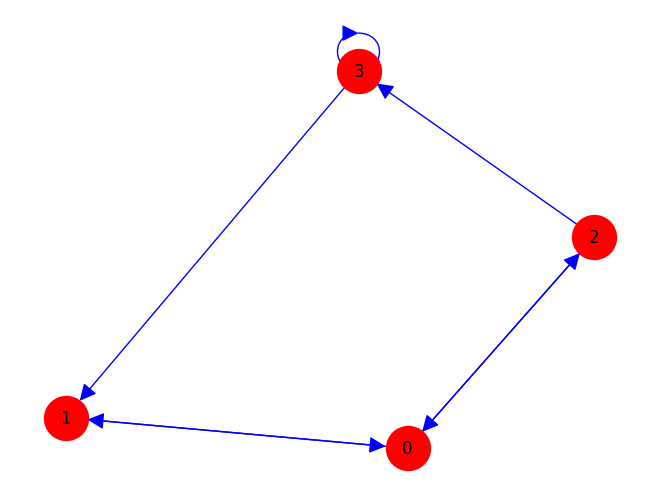

In [16]:
airport_names = ['0', '1', '2', '3']
flights = [('0','1'),('0','2'), ('1','0'), ('2','0'),('2','3'),('3','1'),('3','3')]
G, C = create_airport_graph(airport_names, flights)

In [17]:
print("The related connectivity matrix is C = \n{}".format(C))

The related connectivity matrix is C = 
[[0 1 1 0]
 [1 0 0 0]
 [1 0 0 1]
 [0 1 0 1]]


#### How many flights exist starting from 1 to 3 with **exactly** 3 routes ?

In [18]:
print("Starting from 1 to 3 there are {} flights with exactly 3 routes".format(n_flights(1, 3, 3, C)))

Starting from 1 to 3 there are 1 flights with exactly 3 routes


#### How many flights exist starting from 2 to 0 with **at most** 3 routes ?

In [19]:
print("Starting from 2 to 0 there are {} flights with at most 3 routes".format(n_flights(2, 0, 1, C) +
                                                                               n_flights(2, 0, 2, C) +
                                                                               n_flights(2, 0, 3, C)))

Starting from 2 to 0 there are 4 flights with at most 3 routes


### Exercise n. 2

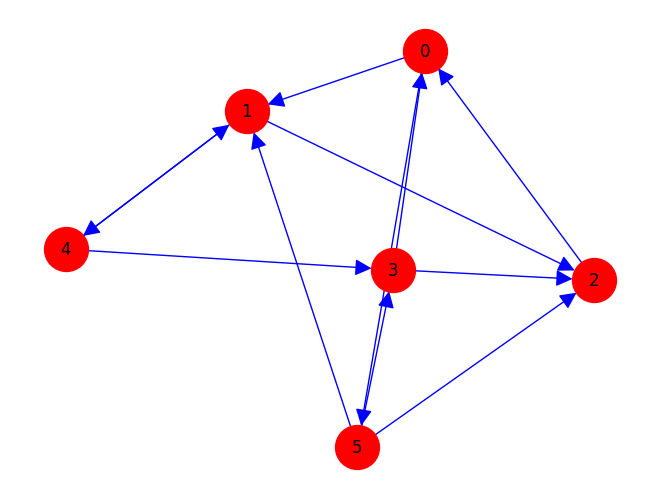

In [20]:
airport_names = ['0', '1', '2', '3', '4', '5']
flights = [('0','1'),('0','5'), ('1','2'), ('1','4'),('2','0'),('3','0'),('3','2'),
           ('4','1'),('4','3'), ('5','1'), ('5','2'), ('5','3')]
G, C = create_airport_graph(airport_names, flights)

In [21]:
print("The related connectivity matrix is C =\n {}".format(C))

The related connectivity matrix is C =
 [[0 1 0 0 0 1]
 [0 0 1 0 1 0]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 1 1 1 0 0]]


#### How many flights exist starting from 5 to 0 with **exactly** 2 routes ?

In [22]:
print("Starting from 5 to 0 there are {} flights with exactly 2 routes".format(n_flights(5, 0, 2, C)))

Starting from 5 to 0 there are 2 flights with exactly 2 routes


#### How many flights exist starting from 5 to 0 with **exactly** 3 routes ?

In [23]:
print("Starting from 5 to 0 there are {} flights with exactly 3 routes".format(n_flights(5, 0, 3, C)))

Starting from 5 to 0 there are 2 flights with exactly 3 routes


#### How many flights exist starting from 2 to 0 with **at most** 3 routes ?

In [24]:
print("Starting from 2 to 0 there are {} flights with at most 3 routes".format(n_flights(2, 0, 1, C) +
                                                                               n_flights(2, 0, 2, C) +
                                                                               n_flights(2, 0, 3, C)))

Starting from 2 to 0 there are 1 flights with at most 3 routes


#### How many flights exist starting from 3 to 4 with **at most** 5 routes ?

In [25]:
print("Starting from 3 to 4 there are {} flights with at most 5 routes".format(n_flights(3, 4, 1, C) +
                                                                               n_flights(3, 4, 2, C) +
                                                                               n_flights(3, 4, 3, C) +
                                                                               n_flights(3, 4, 4, C) +
                                                                               n_flights(3, 4, 5, C)))

Starting from 3 to 4 there are 5 flights with at most 5 routes


### Exercise n. 3

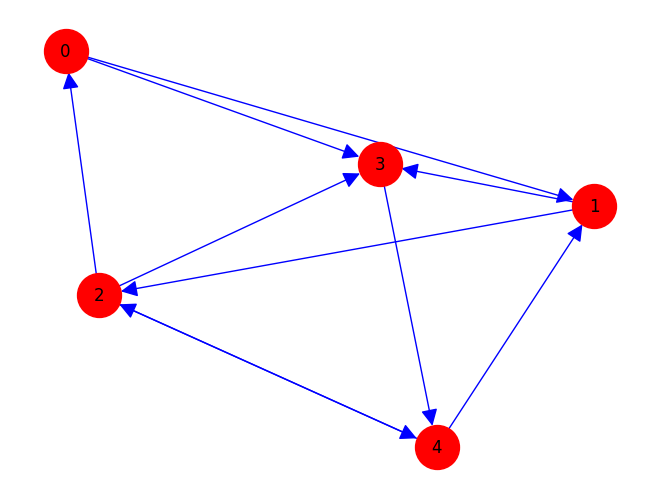

In [26]:
airport_names = ['0', '1', '2', '3', '4']
flights = [('0','1'),('0','3'), ('1','2'), ('1','3'),('2','0'),('2','3'),('2','4'),
           ('3','4'),('4','1'), ('4','2')]
G, C = create_airport_graph(airport_names, flights)

In [27]:
print("The related connectivity matrix is C =\n {}".format(C))

The related connectivity matrix is C =
 [[0 1 0 1 0]
 [0 0 1 1 0]
 [1 0 0 1 1]
 [0 0 0 0 1]
 [0 1 1 0 0]]


#### How many flights exist starting from 3 to 0 with **at most** 4 routes ?

In [28]:
print("Starting from 3 to 0 there are {} flights with at most 4 routes".format(n_flights(3, 0, 1, C) +
                                                                               n_flights(3, 0, 2, C) +
                                                                               n_flights(3, 0, 3, C) +
                                                                               n_flights(3, 0, 4, C)))

Starting from 3 to 0 there are 2 flights with at most 4 routes


#### How many flights exist starting from 4 to 2 with **at most** 4 routes ?

In [29]:
print("Starting from 4 to 2 there are {} flights with at most 4 routes".format(n_flights(4, 2, 1, C) +
                                                                               n_flights(4, 2, 2, C) +
                                                                               n_flights(4, 2, 3, C) +
                                                                               n_flights(4, 2, 4, C)))

Starting from 4 to 2 there are 8 flights with at most 4 routes


### Exercise n. 4

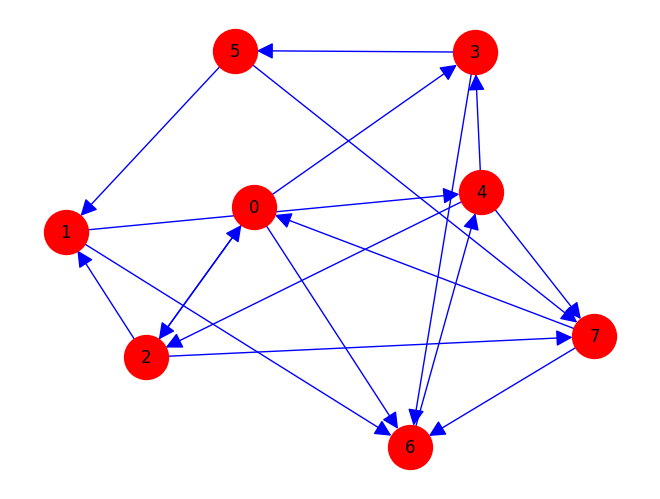

In [30]:
airport_names = ['0', '1', '2', '3', '4', '5', '6', '7']
flights = [('0','2'),('0','3'), ('0','6'),('1','4'), ('1','6'),('2','0'), ('2','1'),
     ('2','7'),('3','5'), ('3','6'), ('4','2'),('4','3'), ('4','7'), ('5','1'),
     ('5','7'), ('6','4'), ('7','0'),('7','6')]
G, C = create_airport_graph(airport_names, flights)

In [31]:
print("The related connectivity matrix is C =\n {}".format(C))

The related connectivity matrix is C =
 [[0 0 1 1 0 0 1 0]
 [0 0 0 0 1 0 1 0]
 [1 1 0 0 0 0 0 1]
 [0 0 0 0 0 1 1 0]
 [0 0 1 1 0 0 0 1]
 [0 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 0]]


#### How many flights exist starting from 0 to 7 with **exactly** 3 routes ?

In [32]:
print("Starting from 0 to 7 there are {} flights with exactly 3 routes".format(n_flights(0, 7, 3, C)))

Starting from 0 to 7 there are 2 flights with exactly 3 routes


#### How many flights exist starting from 4 to 6 with **exactly** 4 routes ?

In [33]:
print("Starting from 4 to 6 there are {} flights with exactly 4 routes".format(n_flights(4, 6, 4, C)))

Starting from 4 to 6 there are 5 flights with exactly 4 routes


#### How many flights exist starting from 4 to 6 with **at most** 4 routes ?

In [34]:
print("Starting from 4 to 6 there are {} flights with at most 4 routes".format(n_flights(4, 6, 1, C) +
                                                                               n_flights(4, 6, 2, C) +
                                                                               n_flights(4, 6, 3, C) +
                                                                               n_flights(4, 6, 4, C)))

Starting from 4 to 6 there are 11 flights with at most 4 routes
